# EDA 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle


## Recopilación de datos

In [23]:
df = pd.read_csv("C:/Users/Simón/sayons-intro-ml-new/data/raw/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Análisis descriptivo 

In [20]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.shape

(48895, 16)

### Interesante hacer agrupaciones por barrio y propietario, aunque observamos que hay demasiados valores lo que imposibilita un buen análisis

In [21]:
df['host_name'].value_counts(), df['neighbourhood'].value_counts()

(host_name
 Michael          417
 David            403
 Sonder (NYC)     327
 John             294
 Alex             279
                 ... 
 Pujan              1
 Raheem             1
 Rusaa              1
 Erin At Bedly      1
 Brad & Rachel      1
 Name: count, Length: 11452, dtype: int64,
 neighbourhood
 Williamsburg          3920
 Bedford-Stuyvesant    3714
 Harlem                2658
 Bushwick              2465
 Upper West Side       1971
                       ... 
 Richmondtown             1
 Fort Wadsworth           1
 New Dorp                 1
 Rossville                1
 Willowbrook              1
 Name: count, Length: 221, dtype: int64)

In [7]:
df.loc[df['calculated_host_listings_count'].idxmax()] #Busco el propietario con mayor número de inmuebles
df.loc[df['host_name'] == 'Sonder (NYC)'] # Resulta ser una inmobiliaria que tiene una gran cantidad de propiedades

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [26]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df['host_id'].value_counts(), df['host_name'].value_counts()

(host_id
 219517861    327
 107434423    232
 30283594     121
 137358866    103
 16098958      96
             ... 
 274040642      1
 274035866      1
 24680832       1
 71142174       1
 274025920      1
 Name: count, Length: 37457, dtype: int64,
 host_name
 Michael          417
 David            403
 Sonder (NYC)     327
 John             294
 Alex             279
                 ... 
 Pujan              1
 Raheem             1
 Rusaa              1
 Erin At Bedly      1
 Brad & Rachel      1
 Name: count, Length: 11452, dtype: int64,
 neighbourhood
 Williamsburg          3920
 Bedford-Stuyvesant    3714
 Harlem                2658
 Bushwick              2465
 Upper West Side       1971
                       ... 
 Richmondtown             1
 Fort Wadsworth           1
 New Dorp                 1
 Rossville                1
 Willowbrook              1
 Name: count, Length: 221, dtype: int64)

In [38]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

## Limpieza de datos

### Eliminar duplicados:

In [41]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [43]:
df.drop('host_id', axis=1).duplicated().sum(), df.drop('host_name', axis=1).duplicated().sum()

(np.int64(0), np.int64(0))

### Nos aseguramos que no existen duplicados en todo el dataset

In [48]:
if df.duplicated().sum():
    df = df.drop_duplicates()
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### No hay filas duplicadas

### Valores nulos o faltantes:

In [10]:
df.isnull().sum().sort_values(ascending=False) / len(df)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### Existe un porcentaje considerable de valores nulos en 'last_review'  y 'reviews_per_month'

### Limpieza de datos: Eliminar información irrelevante
    
Decido eliminar variables redundantes y que no aportan información destacada, en este caso: 'id','host_id', 'name', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood'

In [49]:
df.drop(['id','host_id', 'name', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood' ], axis = 1, inplace = True)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [12]:
df.isnull().sum().sort_values(ascending=False) / len(df)

host_name                         0.000429
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


## Análisis de variables:

### Variables univariante: variables categóricas

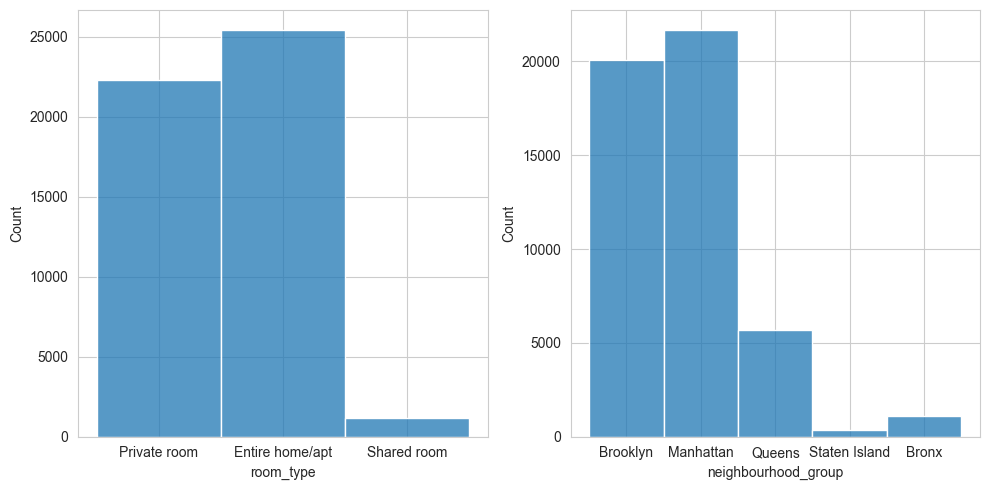

In [57]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
sns.set_style("whitegrid")
sns.histplot(ax=axis[0], data=df, x="room_type")
sns.histplot(ax=axis[1], data=df, x="neighbourhood_group")
plt.tight_layout()
plt.show()

### Observamos que hay más viviendas de tipo 'Entire home' y que la mayoría se encuentran en Brooklyn y Manhattan

### Variables univariante: variables númericas

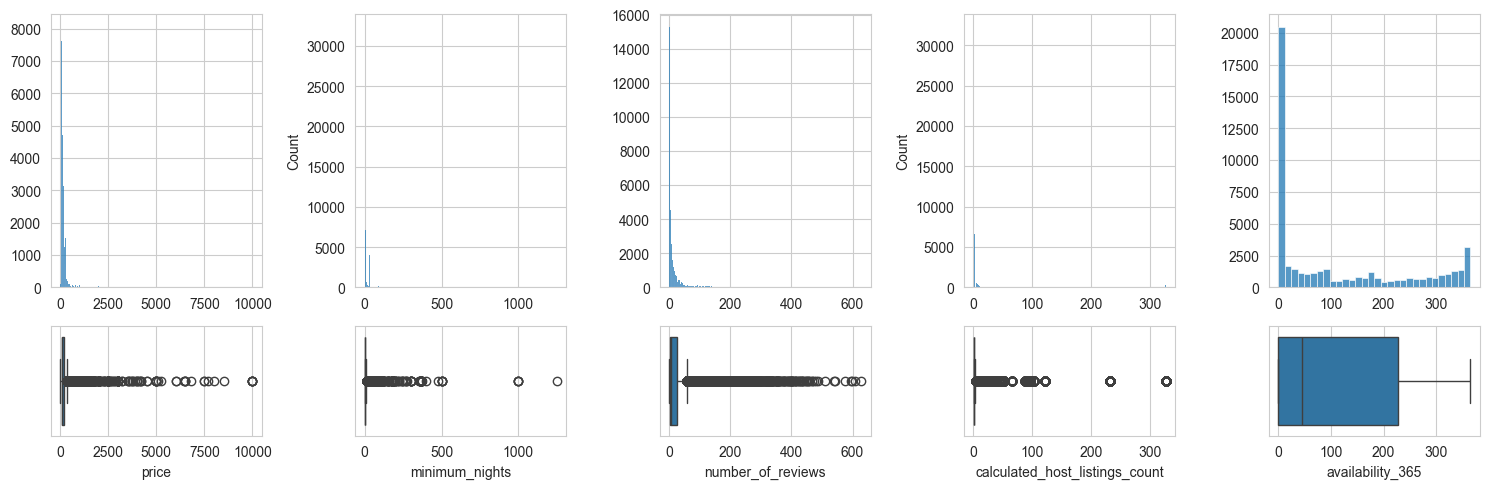

In [62]:
fig, axis = plt.subplots(2, 5, figsize=(15, 5), gridspec_kw={'height_ratios': [5, 2]})
sns.set_style("whitegrid")
sns.histplot(ax=axis[0, 0], data=df, x="price").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="price")
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights").set(xlabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights")
sns.histplot(ax=axis[0, 2], data=df, x="number_of_reviews").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="number_of_reviews")
sns.histplot(ax=axis[0, 3], data=df, x="calculated_host_listings_count").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=df, x="calculated_host_listings_count")
sns.histplot(ax=axis[0, 4], data=df, x="availability_365").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 4], data=df, x="availability_365")


plt.tight_layout()
plt.show()

> #### Observaciones:
>
> - La combinación de los dos gráficos nos permite conocer las distribuciones y sus características estadísticas.
> - De la visualización resultante podemos tener claro las variables que cuentan con valores atípicos.
> - Las distribuciones tienen asimetría, sesgada hacia la izquierda
> - Sería interesante analizar la variable price, a considerar como target

### Análisis de Variables Multivariante: procedemos a buscar todas las posibles relaciones que existen entre las variables

### Codificación de variables categóricas para el estudio de correlaciones, análisis númerico-categórico

In [85]:
df["room_type_n"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]

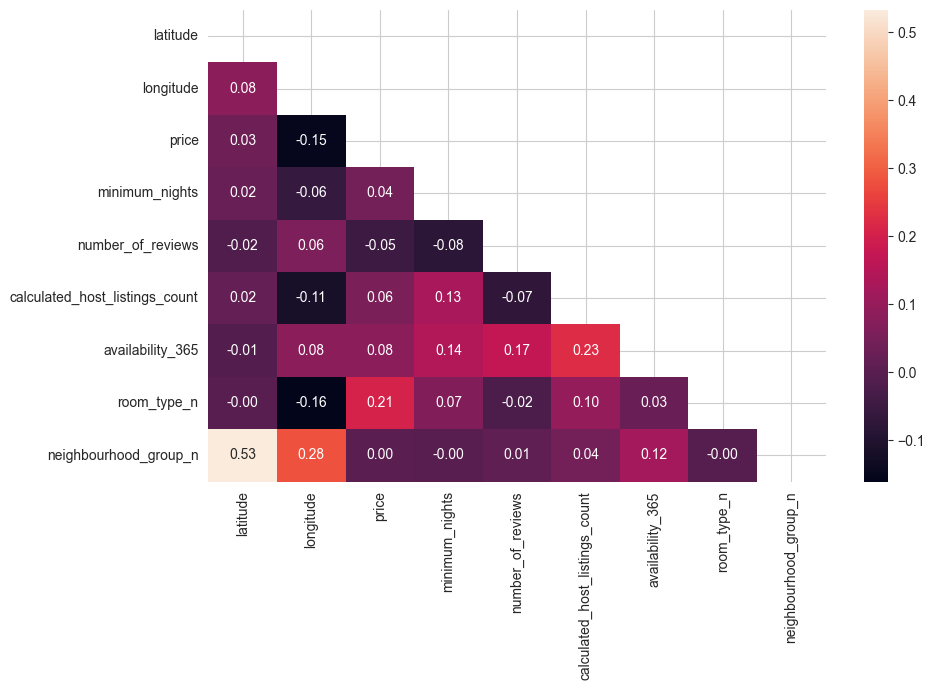

In [ ]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'room_type_n', 'neighbourhood_group_n']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

### Observaciones:
>- El precio se relaciona directamente con el tipo de vivienda
>- Existe una correlación indirecta entre la zona y el precio: hay relación entre el precio y las coordenadas geográficas que a su vez se relacionan con la zona (como era de esperar),
   podemos deducir que la zona está relacionada con el precio
>- El mínimo de noches se relacion con la cantidad de propietarios, puede ser objeto de estudio

### Análisis de variables multivariante: númerico-númerico

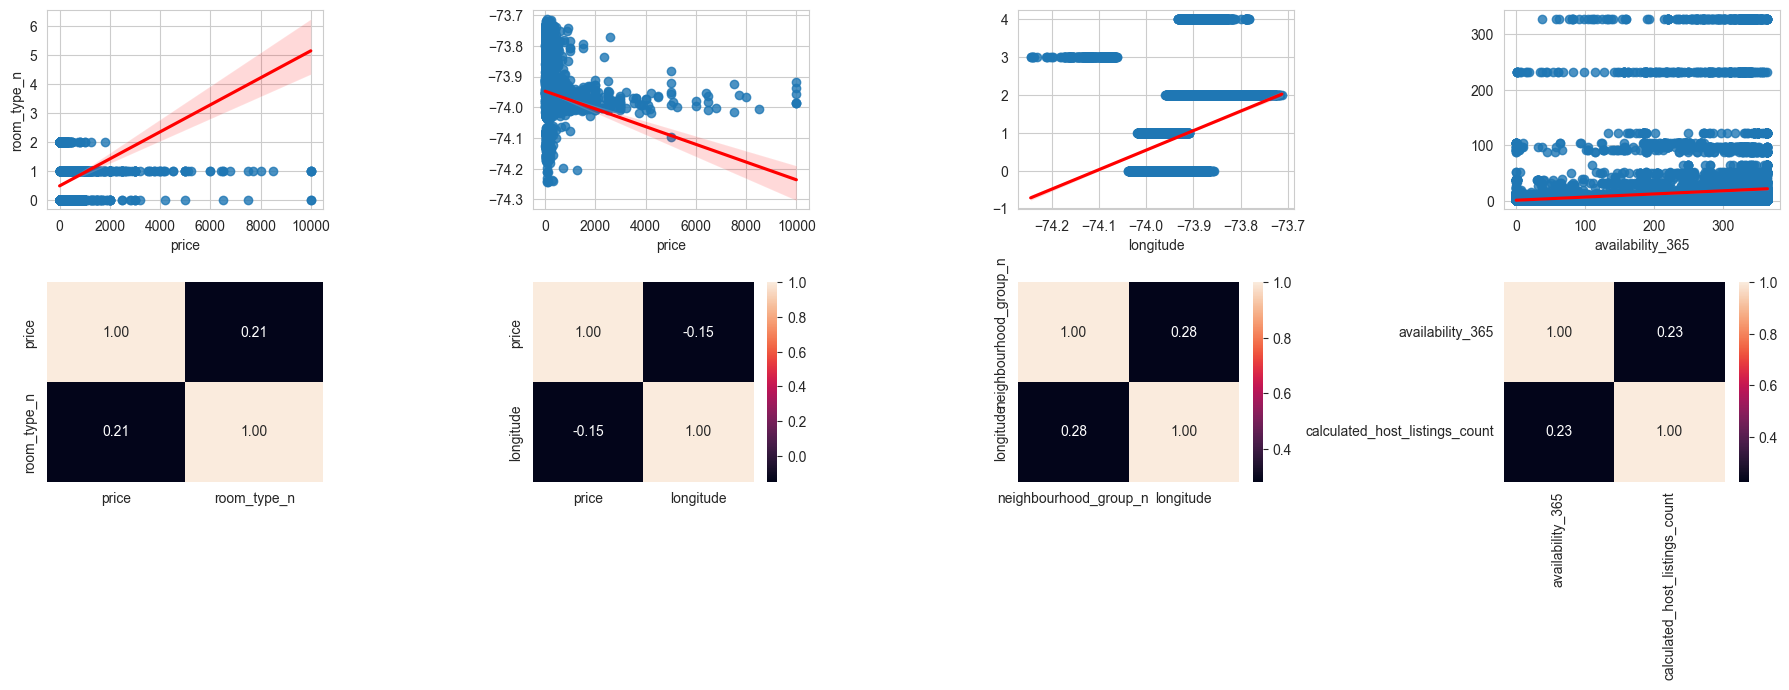

In [83]:
corr_room_price = df[["price", "room_type_n"]].corr()
corr_longitude_price = df[["price", "longitude"]].corr()
corr_longitude_neighbourhood = df[["neighbourhood_group_n", "longitude"]].corr()
corr_availability_host = df[["availability_365", "calculated_host_listings_count"]].corr()

fig, axis = plt.subplots(2, 4, figsize=(18, 7))
sns.set_style("whitegrid")

sns.regplot(ax=axis[0, 0], data=df, x="price", y="room_type_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1, 0], data=corr_room_price, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="price", y="longitude", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_longitude_price, annot=True, fmt=".2f")

sns.regplot(ax=axis[0, 2], data=df, x="longitude", y="neighbourhood_group_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 2], data=corr_longitude_neighbourhood, annot=True, fmt=".2f")

sns.regplot(ax=axis[0, 3], data=df, x="availability_365", y="calculated_host_listings_count", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 3], data=corr_availability_host, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

### Observaciones:
1. Hay mayor cantidad de viviendas tipo 1(entire home) y también son las que alcanzan un precio más elevado, seguidas por las tipo 0(shared room) y luego las tipo 2 (private room).
2. Hay viviendas más caras en una franja de longitud, por debajo de los 1000$ se distribuyen por toda la ciudad.
3. El último gráfico no aporta mucha información, esxisten 2 propietarios con un gran número de viviendas, seguramente inmobiliarias, con disponibilidad muy variada.

### Análisis de variables multivariante: númerico-númerico

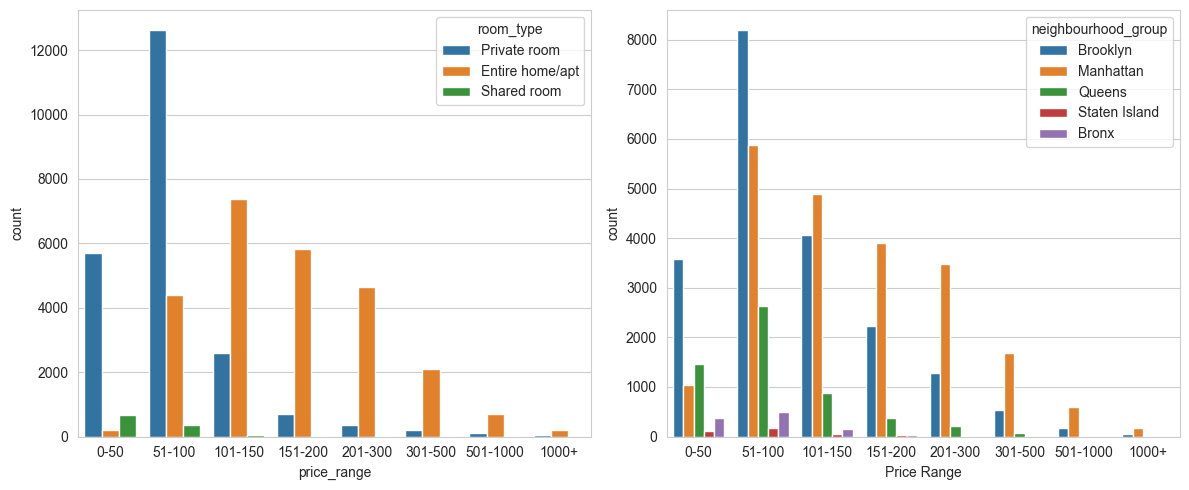

In [86]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
bins = [0, 50, 100, 150, 200, 300, 500, 1000, df["price"].max()]
labels = ["0-50", "51-100", "101-150", "151-200", "201-300", "301-500", "501-1000", "1000+"]
df["price_range"] = pd.cut(df["price"], bins=bins, labels=labels, include_lowest=True)
sns.set_style("whitegrid")
sns.countplot(ax=axis[0], data=df, x="price_range", hue="room_type")
sns.countplot(ax=axis[1], data=df, x="price_range", hue="neighbourhood_group")
plt.xlabel("Price Range")
plt.tight_layout()
plt.show()